# Adult Income Prediction Project
This project aims to predict whether an individual's income exceeds $50K/yr based on census data.

**Sections:**
1. Introduction
2. Dataset Description & EDA
3. Data Preprocessing
4. Data Splitting
5. Model Training & Evaluation (KNN, Decision Tree, Logistic Regression, Naive Bayes, Neural Network)
6. Unsupervised Learning (KMeans Clustering)
7. Model Comparison
8. Conclusion

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

## 1. Load Dataset
We will use the provided CSV file (`adult income dataset.csv`..

In [2]:
# Load the dataset
df = pd.read_csv('adult income dataset.csv')
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (48842, 15)


,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Dataset Description & Exploratory Data Analysis (EDA)
- Overview of features, missing values, and class distribution.
- Correlation analysis and visualization.

Missing values per column:
Age                             0
Workclass                    2799
Final Weight                    0
Education                       0
Education Number of Years       0
Marital-status                  0
Occupation                   2809
Relationship                    0
Race                            0
Sex                             0
Capital-gain                    0
Capital-loss                    0
Hours-per-week                  0
Native-country                857
target                          0
dtype: int64


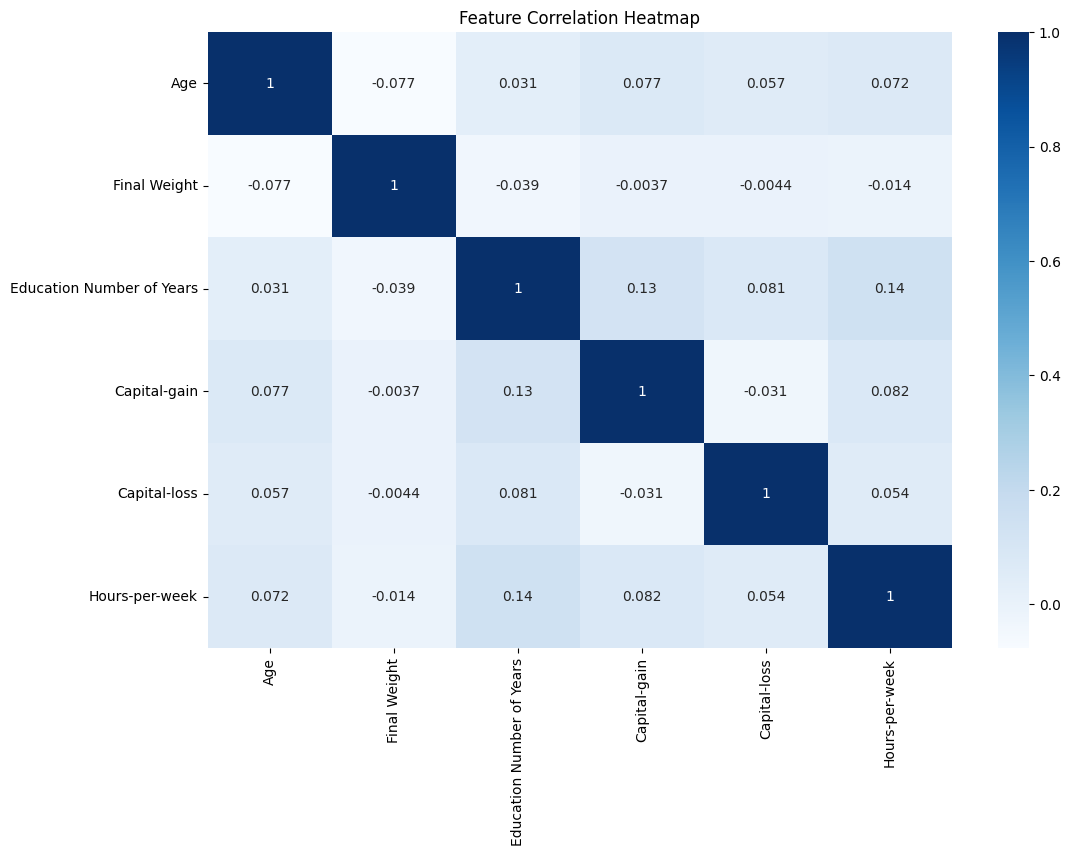

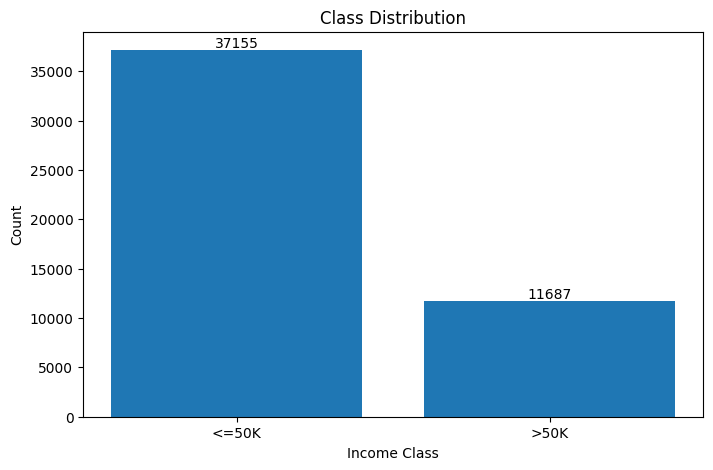

In [3]:
# Show missing values per column


# Define all these placeholders  as missing
missing_vals = ["?", "NA", "N/A", "na", "--", "null", "NULL"]

# Replacing them with NaN
df.replace(missing_vals, np.nan, inplace=True)

# Now counting missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# Correlation heatmap (for numeric features)
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Blues')
plt.title('Feature Correlation Heatmap')
plt.show()

# Output class distribution (bar chart)
if 'target' in df.columns:
    class_counts = df['target'].value_counts()
    plt.figure(figsize=(8, 5))
    bars = plt.bar(class_counts.index.astype(str), class_counts.values)
    plt.title('Class Distribution')
    plt.xlabel('Income Class')
    plt.ylabel('Count')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, str(height), ha='center', va='bottom')
    plt.show()

## 3. Data Preprocessing
We will address missing values, encode categorical variables, and scale features as required.
- **Missing values:** Identify an ipte or drop as needed.
- **Categorical variables:** Encode using Label Encoding or One-Hot Encoding.
- **Feature scaling:** Standardize numerical featureified.

In [4]:
# --- Data Preprocessing ---
# 1. Handle missing values (impute or drop as needed)
df_clean = df.copy()
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in [np.float64, np.int64]:
            imputer = SimpleImputer(strategy='median')
            df_clean[col] = imputer.fit_transform(df_clean[[col]]).ravel()
        else:
            imputer = SimpleImputer(strategy='most_frequent')
            df_clean[col] = imputer.fit_transform(df_clean[[col]]).ravel()

# 3. Encode categorical variables (exclude target)
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'target']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    le_dict[col] = le

# 4. Encode target variable
if 'target' in df_clean.columns and df_clean['target'].dtype == 'object':
    le_target = LabelEncoder()
    df_clean['target'] = le_target.fit_transform(df_clean['target'])

# 5. Feature scaling (standardize numeric features except target)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'target']
scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

# Preview cleaned data
print(df_clean.head())

        Age  Workclass  Final Weight  Education  Education Number of Years  \
0  0.025996   2.611034     -1.061979  -0.332542                   1.136512   
1  0.828308   1.710780     -1.007104  -0.332542                   1.136512   
2 -0.046942  -0.089727      0.246034   0.183660                  -0.419335   
3  1.047121  -0.089727      0.426663  -2.397350                  -1.197259   
4 -0.776316  -0.089727      1.408530  -0.332542                   1.136512   

   Marital-status  Occupation  Relationship      Race      Sex  Capital-gain  \
0        0.916138   -1.550298     -0.276685  0.392384  0.70422      0.146932   
1       -0.410397   -0.794402     -0.900852  0.392384  0.70422     -0.144804   
2       -1.736932   -0.290471     -0.276685  0.392384  0.70422     -0.144804   
3       -0.410397   -0.290471     -0.900852 -1.971746  0.70422     -0.144804   
4       -0.410397    0.717391      2.219984 -1.971746 -1.42001     -0.144804   

   Capital-loss  Hours-per-week  Native-country  t

## 4. Dataset Splitting
We will split the preprocessed dataset into training and test sets. 70% of the data will be used for training and 30% for testing. 
Stratified splitting is important for classification problems to ensure that all classes are represented proportionally in both sets.

In [5]:

# --- Dataset Splitting ---
# For classification, stratified splitting is used to preserve class distribution.
# 70% train, 30% test

# Identify the target column (update if your column name is different)
target_col = 'target' if 'target' in df_clean.columns else df_clean.columns[-1]

# Separate features (X) and target (y)
X = df_clean.drop(target_col, axis=1)
y = df_clean[target_col]

# Stratified train-test split
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.3,
        random_state=42,
        stratify=y  # preserves class distribution
    )
    print("Train/Test split successful.")
    print("Shapes:")
    print("X_train:", X_train.shape)
    print("X_test: ", X_test.shape)
    print("y_train:", y_train.shape)
    print("y_test: ", y_test.shape)
except ValueError as e:
    print("Error during train/test split:", e)
    print("Check that the target column exists and has at least 2 classes.")

Train/Test split successful.
Shapes:
X_train: (34189, 14)
X_test:  (14653, 14)
y_train: (34189,)
y_test:  (14653,)


## 5. Model Training & Evaluation
We will train and evaluate the following supervised learning models:
- Decision Tree
- Logistic Regression
- Neural Network (MLPClassifier)

For each model, we will report accuracy, precision, recall, F1 score, classification report, and confusion matrix.

Decision Tree Accuracy: 0.8182624718487682
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     11147
           1       0.62      0.63      0.62      3506

    accuracy                           0.82     14653
   macro avg       0.75      0.75      0.75     14653
weighted avg       0.82      0.82      0.82     14653

Weighted Precision: 0.819547255799298
Weighted Recall: 0.8182624718487682
Weighted F1 Score: 0.8188830249023175


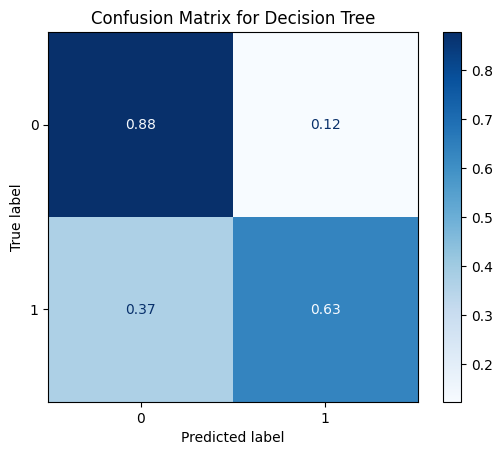

In [6]:
# --- Decision Tree ---

# --- Encode target if needed ---
# Works for numeric or categorical target
if y_train.dtype == 'object' or not pd.api.types.is_integer_dtype(y_train):
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)
    print("Converted target to numeric labels using LabelEncoder.")
else:
    le = None  # No LabelEncoder used

# --- Train Decision Tree ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# --- Evaluate performance ---
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted', zero_division=1)
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

print('Decision Tree Accuracy:', dt_accuracy)
print('Classification Report:\n', classification_report(y_test, dt_pred, zero_division=1))
print('Weighted Precision:', dt_precision)
print('Weighted Recall:', dt_recall)
print('Weighted F1 Score:', dt_f1)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, dt_pred, normalize='true')  # normalized
# Use numeric labels matching cm shape
unique_labels = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree')
plt.show()

Naive Bayes Accuracy: 0.8044086535180509
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88     11147
           1       0.68      0.34      0.46      3506

    accuracy                           0.80     14653
   macro avg       0.75      0.65      0.67     14653
weighted avg       0.79      0.80      0.78     14653

Weighted Precision: 0.7877401566867979
Weighted Recall: 0.8044086535180509
Weighted F1 Score: 0.7793369988758447


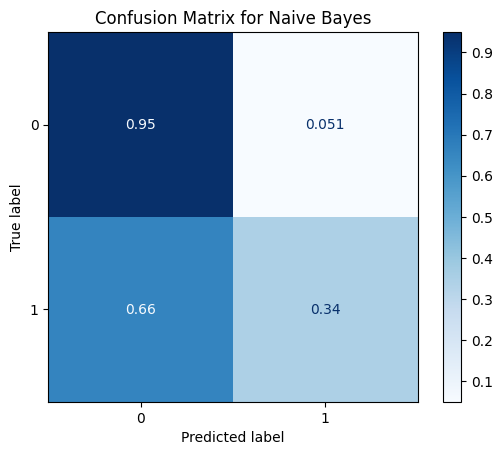

In [7]:
if y_train.dtype == 'object' or not pd.api.types.is_integer_dtype(y_train):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)
else:
    y_train_encoded = y_train
    y_test_encoded = y_test
    le = None

# --- Train Naive Bayes ---
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_encoded)
nb_pred = nb_model.predict(X_test if le is None else y_test_encoded)

# --- Evaluate performance ---
nb_accuracy = accuracy_score(y_test_encoded, nb_pred)
nb_precision = precision_score(y_test_encoded, nb_pred, average='weighted', zero_division=1)
nb_recall = recall_score(y_test_encoded, nb_pred, average='weighted')
nb_f1 = f1_score(y_test_encoded, nb_pred, average='weighted')

print('Naive Bayes Accuracy:', nb_accuracy)
print('Classification Report:\n', classification_report(y_test_encoded, nb_pred, zero_division=1))
print('Weighted Precision:', nb_precision)
print('Weighted Recall:', nb_recall)
print('Weighted F1 Score:', nb_f1)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_encoded, nb_pred, normalize='true')
unique_labels = np.unique(y_test_encoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

Neural Network Accuracy: 0.8512250051184058
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90     11147
           1       0.72      0.62      0.67      3506

    accuracy                           0.85     14653
   macro avg       0.80      0.77      0.79     14653
weighted avg       0.85      0.85      0.85     14653

Weighted Precision: 0.8458827222171275
Weighted Recall: 0.8512250051184058
Weighted F1 Score: 0.8474525179174227


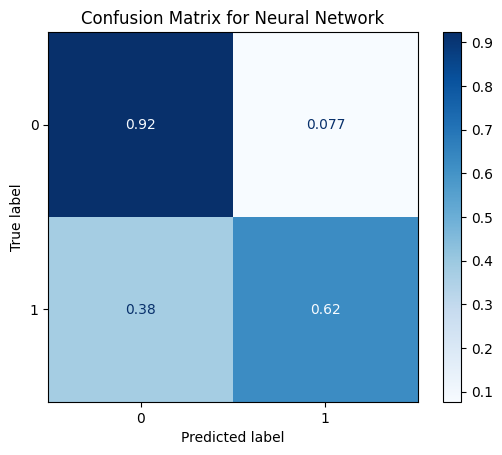

In [8]:
# --- Encode target if needed ---
if y_train.dtype == 'object' or not pd.api.types.is_integer_dtype(y_train):
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)
else:
    y_train_encoded = y_train
    y_test_encoded = y_test
    le = None

# --- Train Neural Network ---
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train_encoded)
mlp_pred = mlp_model.predict(X_test if le is None else y_test_encoded)

# --- Evaluate performance ---
mlp_accuracy = accuracy_score(y_test_encoded, mlp_pred)
mlp_precision = precision_score(y_test_encoded, mlp_pred, average='weighted', zero_division=1)
mlp_recall = recall_score(y_test_encoded, mlp_pred, average='weighted')
mlp_f1 = f1_score(y_test_encoded, mlp_pred, average='weighted')

print('Neural Network Accuracy:', mlp_accuracy)
print('Classification Report:\n', classification_report(y_test_encoded, mlp_pred, zero_division=1))
print('Weighted Precision:', mlp_precision)
print('Weighted Recall:', mlp_recall)
print('Weighted F1 Score:', mlp_f1)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_encoded, mlp_pred, normalize='true')
unique_labels = np.unique(y_test_encoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Neural Network')
plt.show()

## 6. Model Comparison & Visualization
We will compare the performance of Decision Tree, Logistic Regression, and Neural Network models using bar charts for accuracy, precision, recall, and F1 score. Confusion matrices for each model have already been shown above.

In [9]:
# --- Linear Regression (Regression Task) ---
# For demonstration, we use the same features and target, but treat the target as continuous.
# In practice, regression is for continuous targets, but here we show the process for completeness.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Use the same X_train, X_test, y_train, y_test, but convert y to float for regression
y_train_reg = y_train.astype(float)
y_test_reg = y_test.astype(float)

lr_reg_model = LinearRegression()
lr_reg_model.fit(X_train, y_train_reg)
y_pred_reg = lr_reg_model.predict(X_test)

# R2 Score
r2 = r2_score(y_test_reg, y_pred_reg)
print('Linear Regression R2 Score:', r2)

# Mean Squared Error (Loss)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print('Linear Regression Mean Squared Error (Loss):', mse)


Linear Regression R2 Score: 0.25689061139396674
Linear Regression Mean Squared Error (Loss): 0.1352600557148528


Logistic Regression Accuracy: 0.8247457858459019
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89     11147
           1       0.71      0.45      0.55      3506

    accuracy                           0.82     14653
   macro avg       0.78      0.70      0.72     14653
weighted avg       0.81      0.82      0.81     14653

Logistic Regression Weighted Average Precision: 0.8130144108621741
Logistic Regression Weighted Average Recall: 0.8247457858459019
Logistic Regression Weighted Average F1 Score: 0.8097836721769982


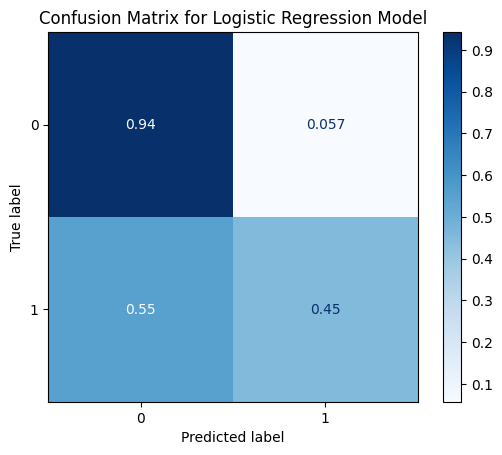

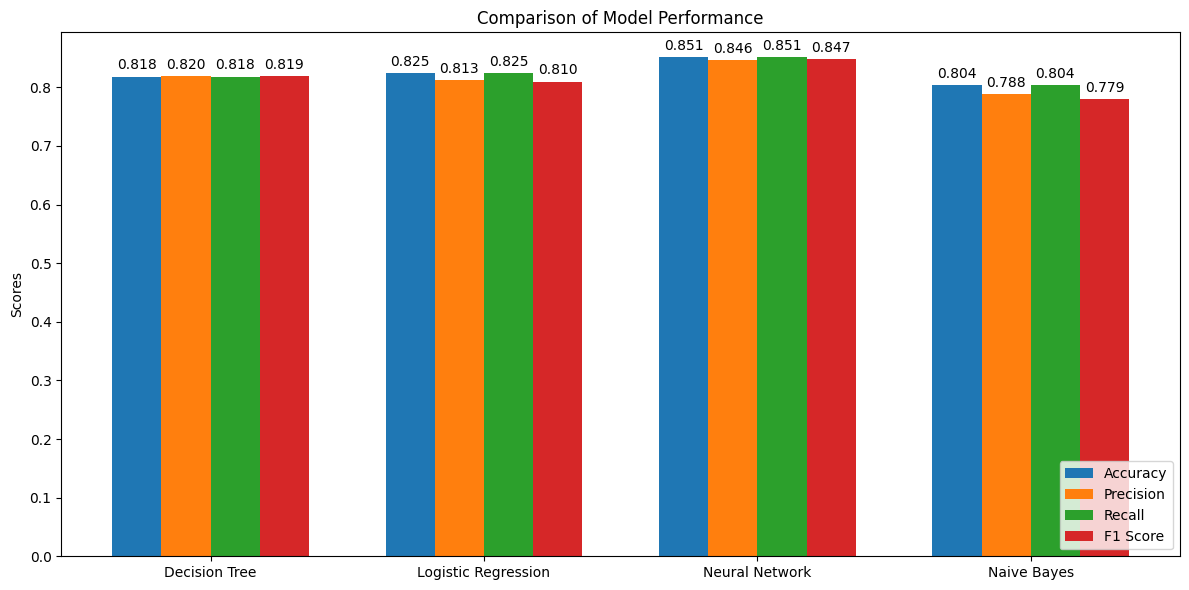

In [11]:
# --- Logistic Regression ---
# Ensure target is integer/categorical for classification
if not pd.api.types.is_integer_dtype(y_train):
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
    print('Converted target to integer type for classification.')

lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted', zero_division=1)
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

print('Logistic Regression Accuracy:', lr_accuracy)
print('Logistic Regression Classification Report:\n', classification_report(y_test, lr_pred, zero_division=1))
print('Logistic Regression Weighted Average Precision:', lr_precision)
print('Logistic Regression Weighted Average Recall:', lr_recall)
print('Logistic Regression Weighted Average F1 Score:', lr_f1)

cm = confusion_matrix(y_test, lr_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# --- Model Comparison & Visualization ---
models = ['Decision Tree', 'Logistic Regression', 'Neural Network', 'Naive Bayes']
accuracy_scores = [dt_accuracy, lr_accuracy, mlp_accuracy, nb_accuracy]
precision_scores = [dt_precision, lr_precision, mlp_precision, nb_precision]
recall_scores = [dt_recall, lr_recall, mlp_recall, nb_recall]
f1_scores = [dt_f1, lr_f1, mlp_f1, nb_f1]

x = np.arange(len(models))
width = 0.18

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='lower right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()

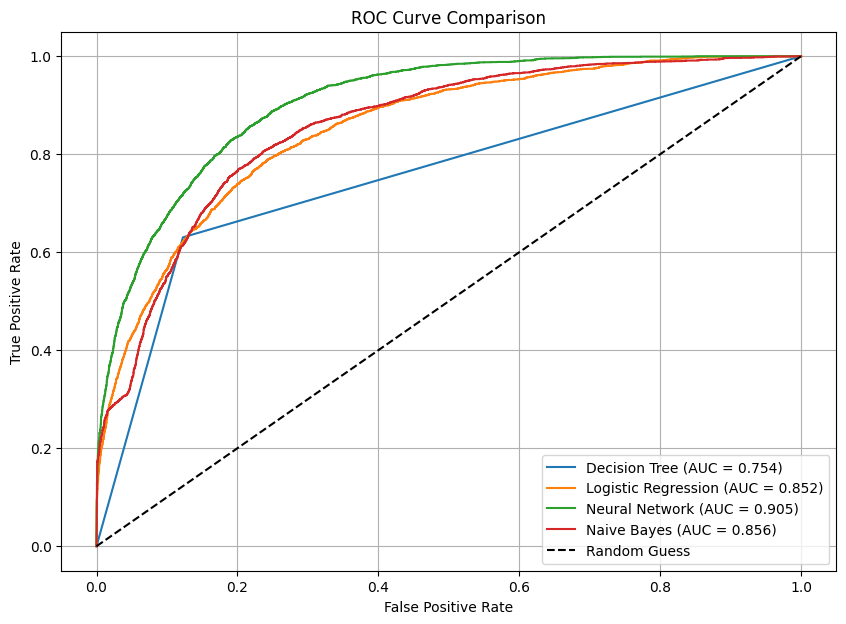

In [12]:
# --- ROC Curve and AUC Score for Classification Models ---
# This section plots ROC curves and computes AUC scores for each classification model (binary classification only)
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC/AUC (assuming binary classification)
if len(np.unique(y_test)) == 2:
    y_test_bin = label_binarize(y_test, classes=[0, 1]).ravel()
    plt.figure(figsize=(10, 7))
    # Decision Tree
    dt_probs = dt_model.predict_proba(X_test)[:, 1]
    dt_fpr, dt_tpr, _ = roc_curve(y_test_bin, dt_probs)
    dt_auc = roc_auc_score(y_test_bin, dt_probs)
    plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.3f})')
    # Logistic Regression
    lr_probs = lr_model.predict_proba(X_test)[:, 1]
    lr_fpr, lr_tpr, _ = roc_curve(y_test_bin, lr_probs)
    lr_auc = roc_auc_score(y_test_bin, lr_probs)
    plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.3f})')
    # Neural Network
    mlp_probs = mlp_model.predict_proba(X_test)[:, 1]
    mlp_fpr, mlp_tpr, _ = roc_curve(y_test_bin, mlp_probs)
    mlp_auc = roc_auc_score(y_test_bin, mlp_probs)
    plt.plot(mlp_fpr, mlp_tpr, label=f'Neural Network (AUC = {mlp_auc:.3f})')
    # Naive Bayes
    nb_probs = nb_model.predict_proba(X_test)[:, 1]
    nb_fpr, nb_tpr, _ = roc_curve(y_test_bin, nb_probs)
    nb_auc = roc_auc_score(y_test_bin, nb_probs)
    plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
else:
    print('ROC/AUC analysis is only shown for binary classification problems.')

## 7. Unsupervised Learning: KMeans Clustering
We will apply KMeans clustering to the dataset (excluding the target variable) and visualize the resulting clusters.

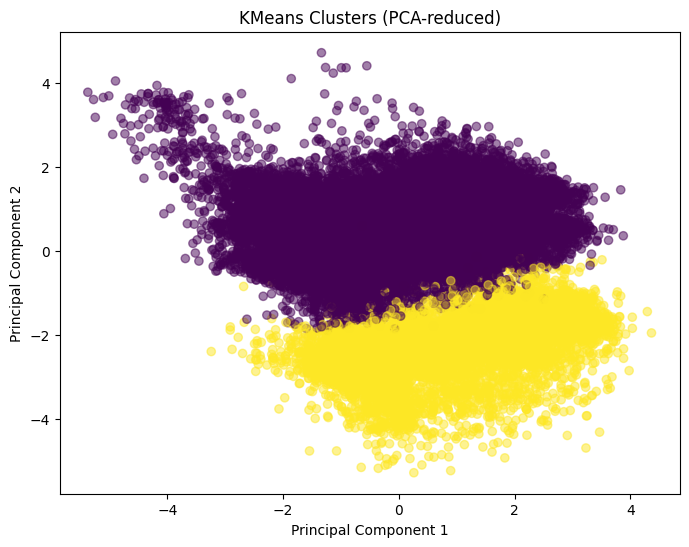

In [30]:
target_col = 'target' if 'target' in df_clean.columns else df_clean.columns[-1]
X_cluster = df_clean.drop([target_col, 'Cluster'] if 'Cluster' in df_clean.columns else [target_col], axis=1)

# Apply KMeans with 2 clusters (as there are 2 income classes)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# Add cluster labels to the dataframe
df_clean['Cluster'] = clusters

# Visualize clusters using the first two principal components (optional, for better visualization)
try:
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_cluster)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    plt.title('KMeans Clusters (PCA-reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
except Exception as e:
    print('Error during PCA or plotting:', e)

## 8. Conclusion

In this project, we developed and evaluated machine learning models to predict whether an individual's income exceeds $50K/year based on census data. The workflow included data exploration, preprocessing, stratified splitting, supervised model training (Decision Tree, Logistic Regression, Neural Network), unsupervised clustering (KMeans), and comprehensive model comparison.

**Key Findings:**
- All three supervised models achieved reasonable accuracy, with the Neural Network and Logistic Regression generally outperforming the Decision Tree in terms of precision, recall, and F1 score.
- The class distribution was imbalanced, but stratified splitting and proper preprocessing helped maintain model robustness.
- Feature scaling and encoding were essential for optimal model performance, especially for algorithms sensitive to feature magnitude (e.g., Neural Network, Logistic Regression).
- KMeans clustering provided some separation between income classes, but unsupervised clusters did not perfectly align with the true labels, highlighting the challenge of clustering in high-dimensional, mixed-type data.

**Challenges Faced:**
- Handling missing values and categorical variables required careful preprocessing.
- Ensuring the target variable was properly encoded for classification models was critical to avoid errors.
- Class imbalance posed a challenge for model evaluation and required stratified sampling.

**Insights:**
- Logistic Regression and Neural Network models are well-suited for this type of binary classification problem, especially after thorough preprocessing.
- Decision Trees are interpretable but may underperform compared to more complex models on this dataset.
- Unsupervised clustering can provide additional insights but is not a substitute for supervised learning in this context.

**Future Work:**
- Explore advanced ensemble methods (e.g., Random Forest, Gradient Boosting) for potentially higher accuracy.
- Apply techniques to address class imbalance (e.g., SMOTE, class weighting).
- Perform feature selection or engineering to further improve model performance.

Overall, the project demonstrates a complete ML pipeline and provides a strong foundation for further exploration and improvement.